<a href="https://colab.research.google.com/github/k-kyrinov/Params_Rec/blob/Python/Python_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x_c = np.array([-7.5, -2.5, 2.5, 7.5, -7.5,-2.5,2.5,7.5,-7.5,-2.5,2.5,7.5,-7.5,-2.5,2.5,7.5])
y_c = np.array([7.5, 7.5,7.5,7.5, 2.5, 2.5,2.5,2.5, -2.5, -2.5,-2.5,-2.5, -7.5, -7.5,-7.5,-7.5])

a = np.loadtxt("W:\\Data\\uni_p\\X1_new.txt", delimiter=',')
E_0 = np.loadtxt("W:\\Data\\uni_p\\E0.txt", delimiter=',')
#mod = np.loadtxt("C:\\Qt\\progects\\MC_EAS\\mod.txt", delimiter=',')
#tet = mod[:,2]
#a.shape, E_0.shape, tet.shape
a.shape, E_0.shape

((88000, 36), (88000,))

In [ ]:
n = a[0:,:16]
XX = a[0:,32:34]

In [ ]:
from scipy.optimize import minimize
from scipy.special import gamma
x_a = np.array([1.97376115143293e-001,2.39192422628323e-001,2.98565164093573e-001,3.58271550162608e-001,4.29917884243487e-001,5.15891890127776e-001,6.19058783209113e-001,7.42856758173555e-001,8.91411572102221e-001,1.06967404164358e+000,1.28358503655918e+000,1.54027346830543e+000,1.84829387192396e+000,2.21791149902107e+000,2.66144442299609e+000,3.19367405769951e+000,3.83233777068348e+000,4.59872000813587e+000,5.51836163164124e+000,6.62191110650248e+000,7.94614590877754e+000,9.53519819098440e+000,1.14420255536611e+001,1.37301759384948e+001,1.64759054607864e+001,1.97707197612597e+001,2.37244235716564e+001,2.84687801255600e+001,3.41619023699168e+001,4.09935223211034e+001,4.91913141748989e+001,5.90284818976854e+001,7.08328641669701e+001,8.49978600973166e+001,1.01995539868228e+002,1.22392377185738e+002,1.46868127886072e+002,1.76238483839769e+002,2.11482257132292e+002,2.53774000475579e+002,3.04523150975701e+002,3.66021651167416e+002,4.39217832914120e+002,5.27051621494212e+002,6.32450212407458e+002,7.58926175087446e+002,9.10694514656579e+002,1.09281314342600e+003,1.31135144356828e+003,1.57359253857203e+003,1.88827601448448e+003])
y_a = np.array([2.82407407407407e-001,2.74074074074074e-001,2.63477366255144e-001,2.54732510288066e-001,2.44444444444444e-001,2.34362139917696e-001,2.23971193415638e-001,2.11316872427984e-001,1.99279835390947e-001,1.86934156378601e-001,1.72222222222222e-001,1.58539094650206e-001,1.44444444444444e-001,1.29115226337449e-001,1.14814814814815e-001,1.00925925925926e-001,8.61111111111111e-002,7.31481481481482e-002,6.12139917695473e-002,4.97942386831276e-002,4.03292181069959e-002,3.24074074074074e-002,2.61316872427984e-002,2.20164609053498e-002,2.04732510288066e-002,2.08847736625514e-002,2.36625514403292e-002,2.91152263374486e-002,3.73456790123457e-002,4.71193415637860e-002,5.92592592592593e-002,7.40740740740741e-002,8.95061728395062e-002,1.06378600823045e-001,1.26131687242798e-001,1.44958847736626e-001,1.64403292181070e-001,1.85699588477366e-001,2.05144032921811e-001,2.24485596707819e-001,2.44753086419753e-001,2.62551440329218e-001,2.79526748971193e-001,2.96913580246914e-001,3.11213991769547e-001,3.25205761316872e-001,3.39711934156379e-001,3.51851851851852e-001,3.63683127572016e-001,3.75205761316872e-001,3.85288065843621e-001])

def Lag(s, r): # нкг с локальным возрастом
    rm = 80.0
    delt = 0.1
    alpha = 0
    for i in range(50):
        if(r>=x_a[i] and r < x_a[i+1]):
            alpha = (y_a[i]-y_a[i+1])/(x_a[i]-x_a[i+1])*r + y_a[i]-x_a[i]*(y_a[i]-y_a[i+1])/(x_a[i]-x_a[i+1])
    return (1/rm/rm)*gamma(4.5-s)/(2*np.pi*gamma(s)*gamma(4.5-2*s))*(r/rm)**(s+alpha-2)*(1+r/rm)**(s+alpha-4.5)

In [ ]:
#def Lag(s, r): # лагутинская нкг
#    rm = 80.0
#    delt = 0.1
#    sm = 0.78-0.21*s
#    return (1/rm/rm/sm/sm)*gamma(4.5-s)/(2*np.pi*gamma(s)*gamma(4.5-2*s))*((r+delt)/rm/sm)**(s-2)*(1+(r+delt)/rm/sm)**(s-4.5)

In [1]:
#def Lag(s, r): #nkg
#    rm = 80.0
#    delt = 0.1
#    return (1/rm/rm)*gamma(4.5-s)/(2*np.pi*gamma(s)*gamma(4.5-2*s))*(r/rm)**(s-2)*(1+r/rm)**(s-4.5)

In [ ]:
# нулевые приближения
Summx = 0
Summy = 0
Q_all = 0
x_0 = np.zeros(n.shape[0])
y_0 = np.zeros(n.shape[0])
for i in range(n.shape[0]):
    Summx = 0
    Summy = 0
    Q_all = 0
    for j in range(16):
        Summx+=n[i][j]*x_c[j]
        Summy+=n[i][j]*y_c[j]
        Q_all+=n[i][j]
    x_0[i] = Summx/Q_all
    y_0[i] = Summy/Q_all

In [ ]:
r = np.zeros((x_0.shape[0],16))
for i in range(x_0.shape[0]):
    r[i] = ((x_0[i]-x_c)**2+(y_0[i]-y_c)**2)**0.5

In [ ]:
import scipy.stats as stats
# нулевые приближения для возраста (можно взять фиксированный)

lower, upper = 0.3, 1.8
mu, sigma = 1, 0.1
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
s_0 = X.rvs(x_0.shape[0])
s_0.shape

(88000,)

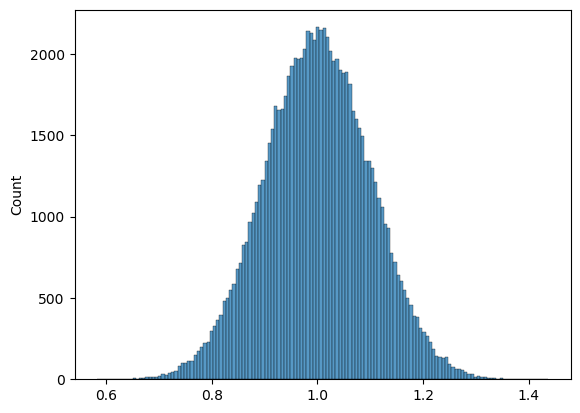

In [ ]:
sns.histplot(s_0)
plt.show()

In [ ]:
# нулевые приближения для мощности
S = 0.36
Q_all = 0
rh = 0
Ne_0 = np.zeros(n.shape[0])
for i in range(n.shape[0]):
    Q_all = 0
    rh = 0
    for j in range(16):
        Q_all+=n[i][j]
        #rh += Lag(1.0, r[i][j])*S
        rh += Lag(s_0[i], r[i][j]+0.1)*S
    Ne_0[i]+=Q_all/rh
Ne_0

array([   71538.09843652,    65223.69646359,    72930.78820936, ...,
       13751171.84676406,  5206691.71688851,  4940260.67096986])

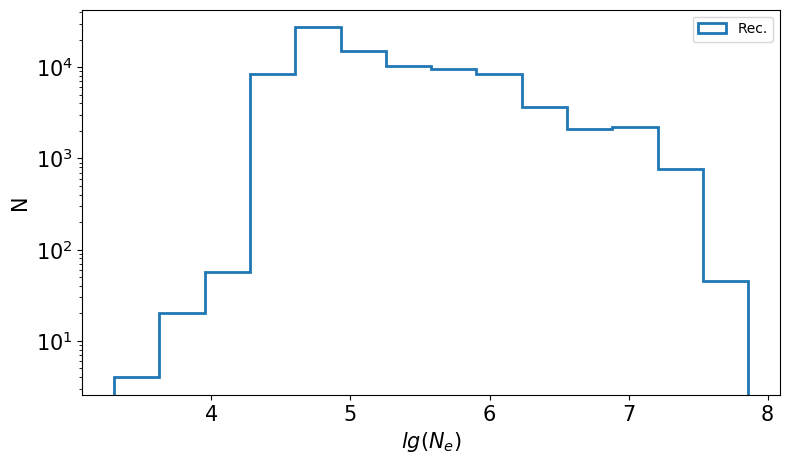

In [ ]:
plt.figure(figsize=(9, 5))
plt.hist(np.log10(Ne_0), histtype = 'step',linewidth=2, bins=14, label='Rec.')
#plt.hist(ne_2, histtype = 'step',linewidth=2, bins=13, label='Rec.')
#plt.hist(Ne, histtype = 'step',linewidth=2, bins=13, label = 'Rec.')
#plt.plot((8, 8),(0,1000), label='Критерий отбора')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$lg(N_e)$",fontsize = 15)
plt.ylabel("N",fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
# Функция правдоподобия
def L(x):
    Summ = 0
    S = 0.36
    for i in range(16):
        #if(n1[i]<25):
        R = np.sqrt((x[2]-x_c[i])**2+(x[3]-y_c[i])**2)
        N_i = x[0]*Lag(x[1],R+0.1)*S
        Summ += n1[i]*np.log(N_i) - N_i
        if(n1[i] < 15):
            Summ += n1[i]*np.log(N_i) - N_i
        else:
            Summ+=np.log(1/(2*np.pi*N_i)**0.5)-((n1[i]-N_i)/(2*(N_i)**0.5))**2
    Summ*=-1
    return Summ

In [ ]:
import warnings
from scipy.optimize import OptimizeResult
warnings.filterwarnings("ignore", category=DeprecationWarning)

Summ = 0
n1 = np.zeros(16)
tet1 = 0
count = 0
x_vosst = np.zeros(n.shape[0])
y_vosst = np.zeros(n.shape[0])
s_vosst = np.zeros(n.shape[0])
ne_vosst = np.zeros(n.shape[0])
suc = []
for i in range(n.shape[0]):
    Summ = 0
    #for j in range(16):
    #    n1[j] = n[i][j]
    n1 = n[i]
    x = np.array([Ne_0[i], s_0[i], x_0[i], y_0[i]]) #1.0
    #res = shgo(L, bounds)
    res = minimize(L, x, method="Nelder-Mead")#, options={'gtol': 1e-8, 'disp': True})
    suc.append(OptimizeResult(res).success)
    #res = minimize(L, x, method="SLSQP")
    #res = minimize(L, x, method="CG", options={'gtol': 1e-6, 'disp': True})
    #res = minimize(L, x, method="Powell")
    #res = least_squares(L, x)
    #print(res.x)
    ne_vosst[i] = res.x[0]
    s_vosst[i] = res.x[1]
    x_vosst[i] = res.x[2]
    y_vosst[i] = res.x[3]
    if((i+1)%100 == 0):
        print(i/n.shape[0], i)
    #print(optimize.minimize(L, x, method="SLSQP")) # Nelder-Mead
print("End")
suc = np.array(suc)

0.001125 99
0.0022613636363636364 199
0.0033977272727272727 299
0.0045340909090909095 399


C:\Users\ASUS Zephyrus\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\ASUS Zephyrus\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ASUS Zephyrus\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


0.005670454545454545 499
0.006806818181818182 599
0.007943181818181818 699
0.009079545454545455 799
0.010215909090909091 899
0.011352272727272726 999
0.012488636363636363 1099
0.013625 1199
0.014761363636363637 1299
0.01589772727272727 1399
0.01703409090909091 1499
0.018170454545454545 1599
0.019306818181818182 1699
0.02044318181818182 1799
0.021579545454545455 1899
0.022715909090909092 1999
0.02385227272727273 2099
0.024988636363636362 2199
0.026125 2299
0.027261363636363636 2399
0.028397727272727272 2499
0.02953409090909091 2599
0.030670454545454546 2699
0.03180681818181818 2799
0.032943181818181816 2899
0.03407954545454545 2999
0.03521590909090909 3099
0.036352272727272726 3199
0.03748863636363636 3299
0.038625 3399
0.039761363636363636 3499
0.04089772727272727 3599
0.04203409090909091 3699
0.04317045454545455 3799
0.04430681818181818 3899
0.04544318181818182 3999
0.04657954545454546 4099
0.047715909090909094 4199
0.04885227272727273 4299
0.04998863636363637 4399
0.051125 4499
0.052

0.3852159090909091 33899
0.38635227272727274 33999
0.38748863636363634 34099
0.388625 34199
0.38976136363636366 34299
0.39089772727272726 34399
0.3920340909090909 34499
0.3931704545454546 34599
0.3943068181818182 34699
0.39544318181818183 34799
0.39657954545454543 34899
0.3977159090909091 34999
0.39885227272727275 35099
0.39998863636363635 35199
0.401125 35299
0.4022613636363636 35399
0.40339772727272727 35499
0.4045340909090909 35599
0.40567045454545453 35699
0.4068068181818182 35799
0.40794318181818184 35899
0.40907954545454545 35999
0.4102159090909091 36099
0.4113522727272727 36199
0.41248863636363636 36299
0.413625 36399
0.4147613636363636 36499
0.4158977272727273 36599
0.4170340909090909 36699
0.41817045454545454 36799
0.4193068181818182 36899
0.4204431818181818 36999
0.42157954545454546 37099
0.4227159090909091 37199
0.4238522727272727 37299
0.4249886363636364 37399
0.426125 37499
0.42726136363636363 37599
0.4283977272727273 37699
0.4295340909090909 37799
0.43067045454545455 3789

0.7704431818181818 67799
0.7715795454545454 67899
0.772715909090909 67999
0.7738522727272727 68099
0.7749886363636364 68199
0.776125 68299
0.7772613636363637 68399
0.7783977272727273 68499
0.7795340909090909 68599
0.7806704545454546 68699
0.7818068181818182 68799
0.7829431818181818 68899
0.7840795454545455 68999
0.7852159090909091 69099
0.7863522727272727 69199
0.7874886363636364 69299
0.788625 69399
0.7897613636363636 69499
0.7908977272727272 69599
0.7920340909090909 69699
0.7931704545454545 69799
0.7943068181818181 69899
0.7954431818181819 69999
0.7965795454545455 70099
0.7977159090909091 70199
0.7988522727272728 70299
0.7999886363636364 70399
0.801125 70499
0.8022613636363637 70599
0.8033977272727273 70699
0.8045340909090909 70799
0.8056704545454545 70899
0.8068068181818182 70999
0.8079431818181818 71099
0.8090795454545454 71199
0.8102159090909091 71299
0.8113522727272727 71399
0.8124886363636363 71499
0.813625 71599
0.8147613636363636 71699
0.8158977272727272 71799
0.81703409090909

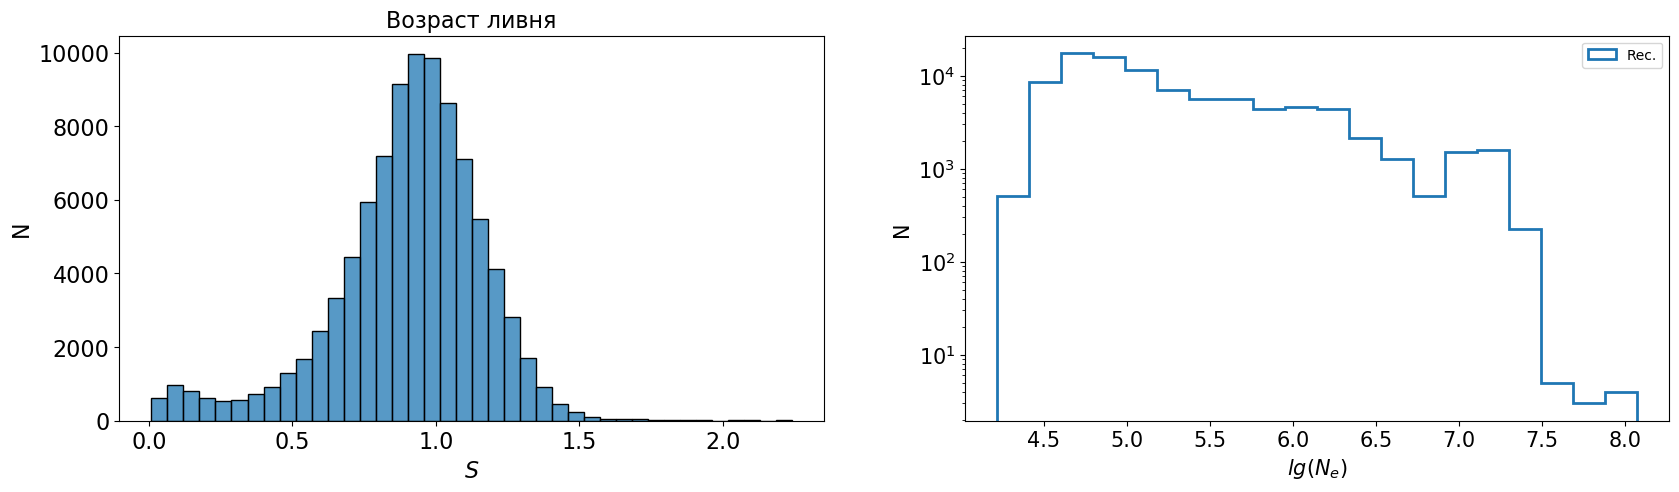

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)

plt.title("Возраст ливня", fontsize=16)
sns.histplot(s_vosst, kde = False, bins=40)
plt.xlabel("$S$", fontsize=16)
plt.ylabel("N", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlim(0,2.3)

plt.subplot(1, 2, 2)
plt.hist(np.log10(ne_vosst), histtype = 'step',linewidth=2, bins=20, label='Rec.')
#plt.hist(Ne, histtype = 'step',linewidth=2, bins=13, label = 'Rec.')
#plt.plot((8, 8),(0,1000), label='Критерий отбора')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$lg(N_e)$",fontsize = 15)
plt.ylabel("N",fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()

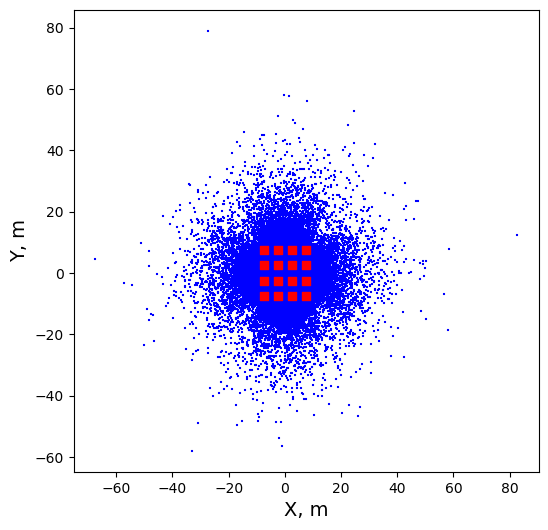

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(x_vosst, y_vosst, marker ="+", color='b', s=3)
plt.scatter(x_c, y_c, marker ="s", color = 'r')

#plt.xlim(-15, 15)
#plt.ylim(-15, 15)
plt.xlabel('X, m', fontsize=14)
plt.ylabel('Y, m', fontsize=14)
plt.show()

In [ ]:
#sym = np.concatenate((x_vosst[:,np.newaxis], y_vosst[:,np.newaxis], s_vosst[:,np.newaxis], ne_vosst[:,np.newaxis], suc[:,np.newaxis]),axis=1)
#np.savetxt('W:\\Data\\uni_p\\simplex_raw.txt', sym, fmt='%0.2f' ,delimiter=',')

In [ ]:
# вычисление систематический погрешности восстановленных параметров по информации Фишера
from iminuit import Minuit
n1 = np.zeros(16)
x_g = np.zeros(n.shape[0])
y_g = np.zeros(n.shape[0])
s_g = np.zeros(n.shape[0])
ne_g = np.zeros(n.shape[0])
suc1 = []
suc2 = []

x_err = np.zeros(n.shape[0])
y_err = np.zeros(n.shape[0])
s_err = np.zeros(n.shape[0])
ne_err = np.zeros(n.shape[0])
for i in range(n.shape[0]):
    n1 = n[i]
    x = np.array([ne_vosst[i], s_vosst[i], x_vosst[i], y_vosst[i]])
    m = Minuit(L, x)
    m.errordef = Minuit.LIKELIHOOD
    #m.errordef = Minuit.LEAST_SQUARES
    #m.limits = [(1, None), (0.8, 1.6), (None, None), (None, None)]
    #m.simplex()
    #m.migrad()
    #m.hesse()

    m.hesse()
    suc1.append(m.valid)
    suc2.append(m.accurate)

    ne_g[i] = m.values[0]
    s_g[i] = m.values[1]
    x_g[i] = m.values[2]
    y_g[i] = m.values[3]

    x_err[i] = m.errors[2]
    y_err[i] = m.errors[3]
    s_err[i] = m.errors[1]
    ne_err[i] = m.errors[0]

    if((i+1)%100 == 0):
        print(i/n.shape[0], i)
    #print(optimize.minimize(L, x, method="SLSQP")) # Nelder-Mead
print("End")
suc1 = np.array(suc1)
suc2 = np.array(suc2)

0.001125 99
0.0022613636363636364 199
0.0033977272727272727 299
0.0045340909090909095 399
0.005670454545454545 499
0.006806818181818182 599
0.007943181818181818 699
0.009079545454545455 799
0.010215909090909091 899
0.011352272727272726 999
0.012488636363636363 1099
0.013625 1199
0.014761363636363637 1299
0.01589772727272727 1399
0.01703409090909091 1499
0.018170454545454545 1599
0.019306818181818182 1699
0.02044318181818182 1799
0.021579545454545455 1899
0.022715909090909092 1999
0.02385227272727273 2099
0.024988636363636362 2199
0.026125 2299
0.027261363636363636 2399
0.028397727272727272 2499
0.02953409090909091 2599
0.030670454545454546 2699
0.03180681818181818 2799
0.032943181818181816 2899
0.03407954545454545 2999
0.03521590909090909 3099
0.036352272727272726 3199
0.03748863636363636 3299
0.038625 3399
0.039761363636363636 3499
0.04089772727272727 3599
0.04203409090909091 3699
0.04317045454545455 3799
0.04430681818181818 3899
0.04544318181818182 3999
0.04657954545454546 4099
0.047

0.3840795454545455 33799
0.3852159090909091 33899
0.38635227272727274 33999
0.38748863636363634 34099
0.388625 34199
0.38976136363636366 34299
0.39089772727272726 34399
0.3920340909090909 34499
0.3931704545454546 34599
0.3943068181818182 34699
0.39544318181818183 34799
0.39657954545454543 34899
0.3977159090909091 34999
0.39885227272727275 35099
0.39998863636363635 35199
0.401125 35299
0.4022613636363636 35399
0.40339772727272727 35499
0.4045340909090909 35599
0.40567045454545453 35699
0.4068068181818182 35799
0.40794318181818184 35899
0.40907954545454545 35999
0.4102159090909091 36099
0.4113522727272727 36199
0.41248863636363636 36299
0.413625 36399
0.4147613636363636 36499
0.4158977272727273 36599
0.4170340909090909 36699
0.41817045454545454 36799
0.4193068181818182 36899
0.4204431818181818 36999
0.42157954545454546 37099
0.4227159090909091 37199
0.4238522727272727 37299
0.4249886363636364 37399
0.426125 37499
0.42726136363636363 37599
0.4283977272727273 37699
0.4295340909090909 37799

0.7704431818181818 67799
0.7715795454545454 67899
0.772715909090909 67999
0.7738522727272727 68099
0.7749886363636364 68199
0.776125 68299
0.7772613636363637 68399
0.7783977272727273 68499
0.7795340909090909 68599
0.7806704545454546 68699
0.7818068181818182 68799
0.7829431818181818 68899
0.7840795454545455 68999
0.7852159090909091 69099
0.7863522727272727 69199
0.7874886363636364 69299
0.788625 69399
0.7897613636363636 69499
0.7908977272727272 69599
0.7920340909090909 69699
0.7931704545454545 69799
0.7943068181818181 69899
0.7954431818181819 69999
0.7965795454545455 70099
0.7977159090909091 70199
0.7988522727272728 70299
0.7999886363636364 70399
0.801125 70499
0.8022613636363637 70599
0.8033977272727273 70699
0.8045340909090909 70799
0.8056704545454545 70899
0.8068068181818182 70999
0.8079431818181818 71099
0.8090795454545454 71199
0.8102159090909091 71299
0.8113522727272727 71399
0.8124886363636363 71499
0.813625 71599
0.8147613636363636 71699
0.8158977272727272 71799
0.81703409090909